In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 모델의 최적의 하이퍼 파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 학습 모델 저장을 위한 라이브러리
import pickle

# 시간 관련
import time

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 파일 경로
import pandas as pd

# 1. 파일 경로
file_path = 'data/성과정보_with_segment.csv'

# 2. 사용할 컬럼 리스트
selected_columns = [
    "증감율_이용건수_할부_전월", "증감율_이용건수_CA_전월", "증감율_이용건수_체크_전월",
    "증감율_이용금액_신용_전월", "증감율_이용금액_신판_전월", "증감율_이용금액_일시불_전월", "증감율_이용금액_할부_전월",
    "증감율_이용건수_신용_분기", "증감율_이용건수_신판_분기", "증감율_이용건수_일시불_분기",
    "증감율_이용금액_신용_분기", "증감율_이용금액_신판_분기", "증감율_이용금액_일시불_분기", "증감율_이용금액_체크_분기",
    "잔액_신판평균한도소진율_r6m", "잔액_신판최대한도소진율_r6m", "잔액_신판평균한도소진율_r3m", "잔액_신판최대한도소진율_r3m",
    "잔액_신판ca평균한도소진율_r6m", "잔액_신판ca최대한도소진율_r6m", "잔액_신판ca평균한도소진율_r3m", "잔액_신판ca최대한도소진율_r3m",
    "변동률_RV일시불평잔", "변동률_할부평잔", "변동률_RVCA평잔", "변동률_카드론평잔"
]

In [5]:
# 3. 파일 불러오기
df = pd.read_csv(file_path, usecols=selected_columns)

# 결과 확인
display(df)

,증감율_이용건수_할부_전월,증감율_이용건수_CA_전월,증감율_이용건수_체크_전월,증감율_이용금액_신용_전월,증감율_이용금액_신판_전월,증감율_이용금액_일시불_전월,증감율_이용금액_할부_전월,증감율_이용건수_신용_분기,증감율_이용건수_신판_분기,증감율_이용건수_일시불_분기,...,잔액_신판평균한도소진율_r3m,잔액_신판최대한도소진율_r3m,잔액_신판ca평균한도소진율_r6m,잔액_신판ca최대한도소진율_r6m,잔액_신판ca평균한도소진율_r3m,잔액_신판ca최대한도소진율_r3m,변동률_RV일시불평잔,변동률_할부평잔,변동률_RVCA평잔,변동률_카드론평잔
0,1.999996,0.0,0.000000,0.409766,0.409766,0.313300,1.999996,-0.476453,-0.476453,-0.476453,...,0.154402,0.194447,0.803171,0.849842,0.804911,0.885171,0.999998,1.042805,0.999998,0.999998
1,0.000000,0.0,0.000000,-1.010817,-1.010817,-1.010817,0.000000,0.226240,0.226240,0.226240,...,0.658524,0.807739,0.630098,0.851009,0.676044,0.822757,1.092698,0.905663,0.999998,0.999998
2,-1.999996,0.0,0.000000,-0.902166,-0.902166,0.289565,-1.999996,0.158594,0.158594,0.030082,...,0.268120,0.334369,0.662760,0.938161,0.701366,0.863484,1.006124,1.993590,0.999998,0.999998
3,-1.999996,0.0,0.000000,-0.866052,-0.866052,0.276947,-0.138126,0.120484,0.120484,0.120484,...,0.337358,0.424204,0.959484,1.135424,0.944312,1.081369,0.999998,1.050646,0.999998,0.999998
4,0.000000,0.0,0.000000,0.000028,0.000028,0.000028,0.000000,-1.999996,-1.999996,-1.999996,...,0.000000,0.000000,0.011619,0.000000,0.000000,0.000000,0.999998,0.999998,0.999998,0.999998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,0.000000,0.0,-0.081943,0.000027,0.000027,0.000027,0.000000,0.000000,0.000000,0.000000,...,0.014102,0.021460,0.000000,0.032439,0.020381,0.032439,0.999998,0.999998,0.999998,0.999998
2399996,0.000000,0.0,0.000000,0.207099,0.207099,0.207099,0.000000,-0.679340,-0.679340,-0.679340,...,0.061004,0.093002,0.097646,0.168081,0.074934,0.102705,0.999998,0.999998,0.999998,0.921733
2399997,0.000000,0.0,0.000000,0.254495,0.254495,0.229573,-1.999996,-0.271198,-0.271198,-0.286386,...,0.111780,0.183969,0.096427,0.190393,0.127628,0.190393,0.999998,0.345027,0.999998,0.999998
2399998,0.000000,0.0,0.000000,0.000034,0.000034,0.000034,0.000000,0.000000,0.000000,0.000000,...,0.012544,0.009594,0.000000,0.012677,0.010469,0.012677,0.999998,0.999998,0.999998,0.999998


### 애매했던 컬럼들 VIF 및 상관 확인 후 제거

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# 사용할 컬럼 목록
vif_cols = [
    "증감율_이용건수_CA_전월", "증감율_이용건수_체크_전월", "증감율_이용금액_신용_전월", "증감율_이용금액_할부_전월",
    "증감율_이용건수_신용_분기", "증감율_이용건수_신판_분기", "증감율_이용건수_일시불_분기",
    "증감율_이용금액_신용_분기", "증감율_이용금액_신판_분기", "증감율_이용금액_일시불_분기", "증감율_이용금액_체크_분기",
    "잔액_신판평균한도소진율_r3m", "잔액_신판최대한도소진율_r3m", "잔액_신판ca평균한도소진율_r3m", "잔액_신판ca최대한도소진율_r3m"
]

# VIF 계산용 데이터프레임 (결측 제거 또는 대체 필요)
vif_df = df[vif_cols].dropna()

# VIF 계산
vif_result = pd.DataFrame()
vif_result["Feature"] = vif_df.columns
vif_result["VIF"] = [variance_inflation_factor(vif_df.values, i) for i in range(vif_df.shape[1])]

# 결과 출력
print("✅ VIF 결과:")
display(vif_result.sort_values(by="VIF", ascending=False))

✅ VIF 결과:


,Feature,VIF
12,잔액_신판최대한도소진율_r3m,214.342107
11,잔액_신판평균한도소진율_r3m,200.610836
14,잔액_신판ca최대한도소진율_r3m,189.422592
13,잔액_신판ca평균한도소진율_r3m,168.672361
5,증감율_이용건수_신판_분기,82.344206
8,증감율_이용금액_신판_분기,68.869151
4,증감율_이용건수_신용_분기,59.796609
7,증감율_이용금액_신용_분기,52.471126
6,증감율_이용건수_일시불_분기,34.440893
9,증감율_이용금액_일시불_분기,28.282994


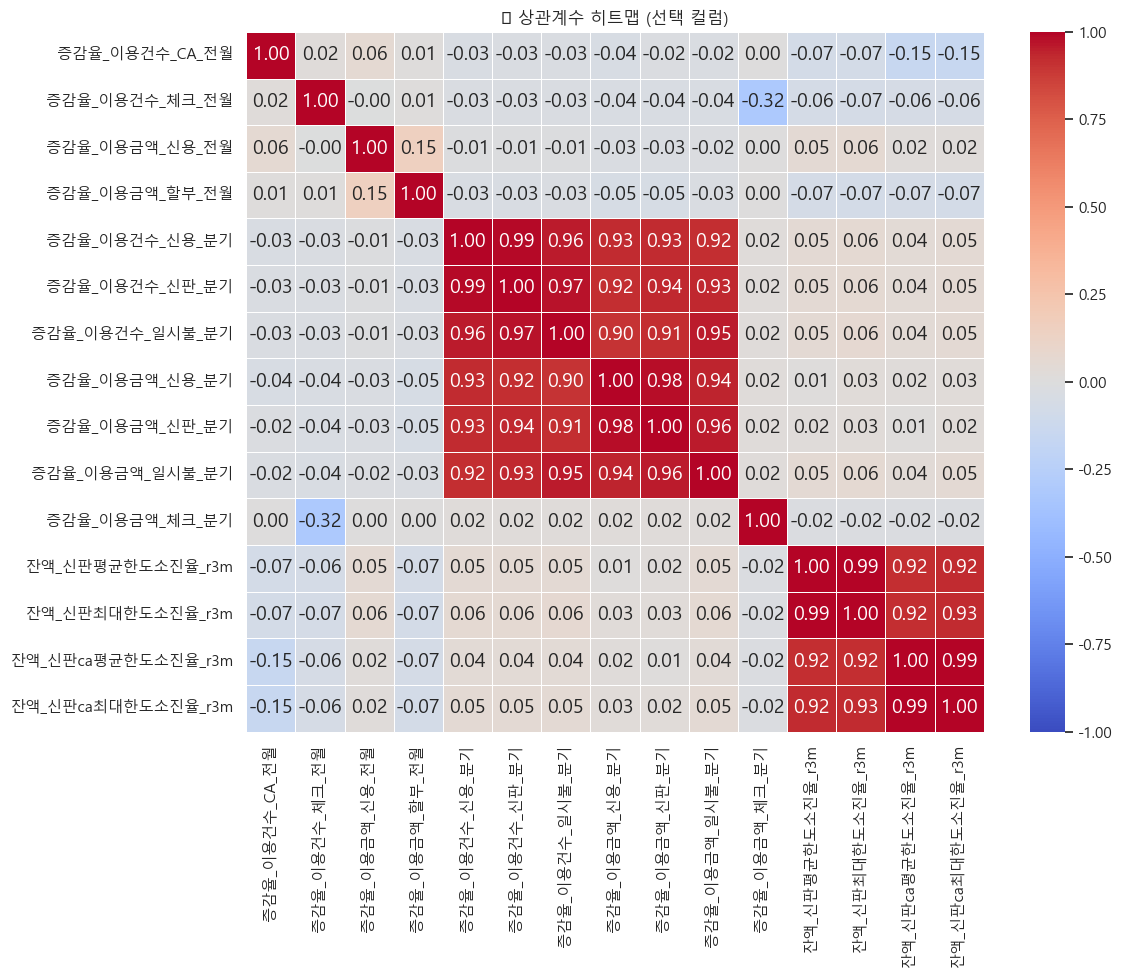

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관계수 계산
corr = df[vif_cols].corr()

# 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmax=1, vmin=-1)
plt.title("📊 상관계수 히트맵 (선택 컬럼)")
plt.tight_layout()
plt.show()

### 최종 선정된 파일 csv 파일로 저장하기

In [17]:
# 추가적으로 제거할 컬럼 목록
drop_cols = [
    "증감율_이용건수_신용_분기",
    "증감율_이용금액_신판_분기",
    "증감율_이용금액_일시불_분기",
    "잔액_신판평균한도소진율_r3m",
    "잔액_신판ca최대한도소진율_r3m",
    "잔액_신판ca평균한도소진율_r3m"
]


In [19]:
import pandas as pd

# 1. 파일 불러오기
file_path = 'data/성과정보_with_segment.csv'
df = pd.read_csv(file_path)

# 2. 컬럼 제거
df_cleaned = df.drop(columns=drop_cols)

# 3. 저장 (CSV로)
save_path = 'data/성과정보_selected_columns.csv'
df_cleaned.to_csv(save_path, index=False, encoding='utf-8-sig')

print(f"✅ 전처리 완료! 총 {len(drop_cols)}개 컬럼 제거됨")
print(f"📁 저장 경로: {save_path}")

✅ 전처리 완료! 총 6개 컬럼 제거됨
📁 저장 경로: data/성과정보_selected_columns.csv


In [23]:
# 결과 확인용
check_point = pd.read_csv('data/성과정보_selected_columns.csv')
check_point

,기준년월,ID,증감율_이용건수_신용_전월,증감율_이용건수_신판_전월,증감율_이용건수_일시불_전월,증감율_이용건수_할부_전월,증감율_이용건수_CA_전월,증감율_이용건수_체크_전월,증감율_이용건수_카드론_전월,증감율_이용금액_신용_전월,...,변동률_할부평잔,변동률_CA평잔,변동률_RVCA평잔,변동률_카드론평잔,변동률_잔액_B1M,변동률_잔액_일시불_B1M,변동률_잔액_CA_B1M,혜택수혜율_R3M,혜택수혜율_B0M,Segment
0,201807,TRAIN_000000,0.454548,0.454548,0.364727,1.999996,0.0,0.000000,0.0,0.409766,...,1.042805,0.999700,0.999998,0.999998,0.261886,0.270752,0.000000,1.044401,1.280543,D
1,201807,TRAIN_000001,-0.511808,-0.511808,-0.511808,0.000000,0.0,0.000000,0.0,-1.010817,...,0.905663,0.999998,0.999998,0.999998,-0.563388,-0.670348,0.000000,0.000000,0.000000,E
2,201807,TRAIN_000002,-0.062716,-0.062716,0.067843,-1.999996,0.0,0.000000,0.0,-0.902166,...,1.993590,0.852567,0.999998,0.999998,-0.046516,0.058114,-0.014191,0.524159,1.208420,C
3,201807,TRAIN_000003,0.135707,0.135707,0.153975,-1.999996,0.0,0.000000,0.0,-0.866052,...,1.050646,0.999877,0.999998,0.999998,0.023821,0.258943,0.000000,0.880925,1.657124,D
4,201807,TRAIN_000004,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000028,...,0.999998,0.999998,0.999998,0.999998,0.000000,0.000000,0.000000,NaN,NaN,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,TRAIN_399995,0.000000,0.000000,0.000000,0.000000,0.0,-0.081943,0.0,0.000027,...,0.999998,0.999998,0.999998,0.999998,0.000000,0.000000,0.000000,NaN,NaN,E
2399996,201812,TRAIN_399996,0.073804,0.073804,0.073804,0.000000,0.0,0.000000,0.0,0.207099,...,0.999998,0.999998,0.999998,0.921733,-0.203251,-0.159143,0.000000,1.377071,2.533815,D
2399997,201812,TRAIN_399997,-0.040432,-0.040432,-0.040432,0.000000,0.0,0.000000,0.0,0.254495,...,0.345027,0.999998,0.999998,0.999998,0.027319,0.126581,0.000000,0.000000,0.000000,C
2399998,201812,TRAIN_399998,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000034,...,0.999998,0.999998,0.999998,0.999998,0.000000,0.000000,0.000000,NaN,NaN,E
